<center> <h1> Object Size Experiments </h1> </center>

In [4]:
# Centralize the graphs and tables.
from IPython.core.display import HTML, display

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

,percentiles,latency
0,1.00,21.102592
1,5.00,21.889024
2,10.00,22.413312
3,20.00,22.937600
4,30.00,23.461888
5,40.00,23.986176
6,50.00,24.772608
7,60.00,26.607616
8,70.00,28.442624
9,80.00,30.539776


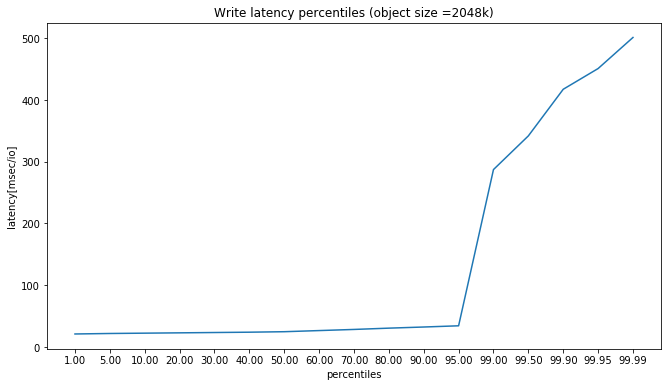

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

#read json result
with open('./data/test.json') as f:
    data = json.load(f)

#transform data
percentiles = pd.DataFrame(data['jobs'][0]['read']['clat_ns']['percentile'],index=['latency'])
rw = percentiles.T
rw = rw.reset_index()
rw.rename(columns={'index': 'percentiles'}, inplace=True)

#format data
rw[['percentiles']] = rw[['percentiles']].astype(float).applymap('{:,.2f}'.format)
rw[['latency']] = rw[['latency']].astype(int).applymap(lambda x: x/1000000)

#display table
display(rw)

#display graph
obj_size = data['jobs'][0]['job options']['bs']
fig = rw.plot(x='percentiles', y='latency', title="Write latency percentiles (object size =" + obj_size + ')' ,legend=False, xticks=rw.index , figsize=[11,6])
fig.set_ylabel("latency[msec/io]")
plt.show()
